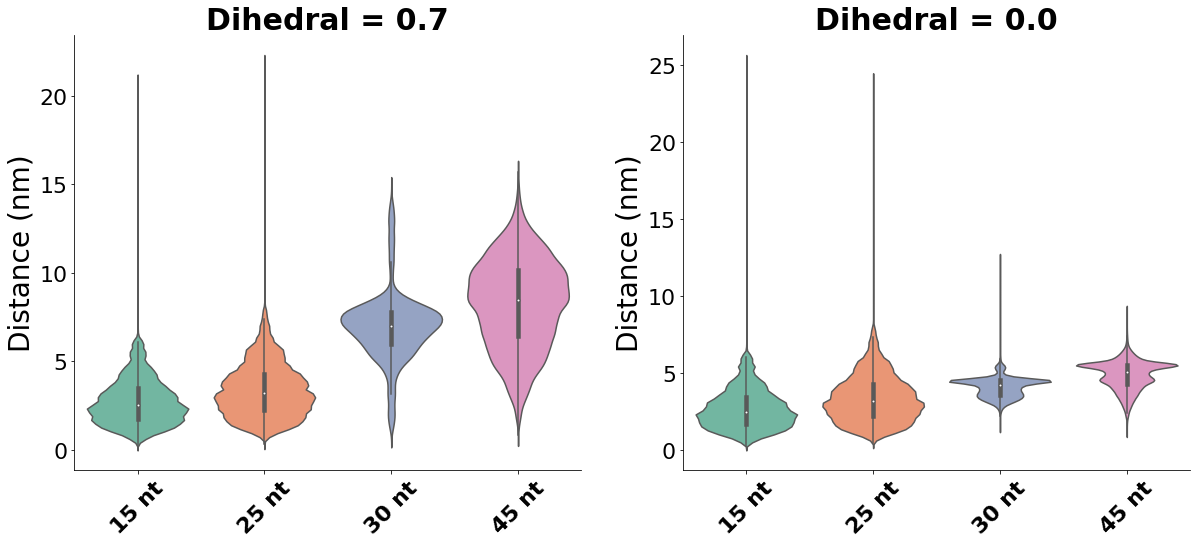

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


list = [15, 25, 30, 45]
length = ['15 nt', '25 nt', '30 nt', '45 nt']

xtick_pos = np.array([0, 1, 2, 3])
cmap = sns.color_palette("Set2")

data0_0, median_dna_0, std_dna_0 = [], [], []
data0_4, median_dna_4, std_dna_4 = [], [], []

for ll in list:
    name_0 = "/trajectories/gargi/RPA_Ed/RESULTS.ANALYSIS/end_to_end_RPA_rad_3.7_" + \
        str(ll)+"_dih_0.0.txt"
    name_4 = "/trajectories/gargi/RPA_Ed/RESULTS.ANALYSIS/end_to_end_RPA_rad_3.7_" + \
        str(ll)+"_dih_0.7.txt"
    data_0 = np.loadtxt(name_0)
    data_4 = np.loadtxt(name_4)
    mask = np.isnan(data_0)
    data_n0 = data_0[~mask]
    maskp = np.isnan(data_4)
    data_n4 = data_4[~maskp]
    dt_0 = data_n0/10
    dt_4 = data_n4/10
    me0, me4 = np.mean(dt_0), np.mean(dt_4)
    sd0, sd4 = np.std(dt_0), np.mean(dt_4)
    median_dna_0.append(me0)
    std_dna_0.append(sd0)
    data0_0.append(dt_0)
    median_dna_4.append(me4)
    std_dna_4.append(sd4)
    data0_4.append(dt_4)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

sns.violinplot(data=data0_4, width=0.8,
               ax=ax[0], palette=cmap, split=True, scale="width")
sns.violinplot(data=data0_0, width=0.8,
               ax=ax[1], palette=cmap, split=True, scale="width")

ax[0].set_title('Dihedral = 0.7', fontsize=30, fontweight='bold')
ax[1].set_title('Dihedral = 0.0', fontsize=30, fontweight='bold')
for axp in ax:
    axp.set_xticks(xtick_pos, length, fontsize=24,
                   fontweight='bold', rotation=45)
    axp.set_ylabel('Distance (nm)', fontsize=28)
    axp.xaxis.tick_bottom()
    axp.yaxis.tick_left()
    axp.tick_params(axis='both', which='major', labelsize=22)

    spines_to_keep = ['bottom', 'left']
    spines_to_remove = ['top', 'right']

    for spine in spines_to_remove:
        axp.spines[spine].set_visible(False)
#fig.savefig('length_vs_distance_rpa_dna_violin.png', dpi=300, bbox_inches='tight')

In [4]:
print(median_dna_0, median_dna_4)


[2.7381288006212077, 3.394690060673063, 4.12313617299843, 4.891644834693877] [2.7509829378397237, 3.390110068124065, 6.950402510963361, 8.2546262394546]


In [5]:
np.savetxt('rpa_dna_3.7_med_val_0.txt', median_dna_0, fmt='%8.3f')
np.savetxt('rpa_dna_3.7_med_val_4.txt', median_dna_4, fmt='%8.3f')

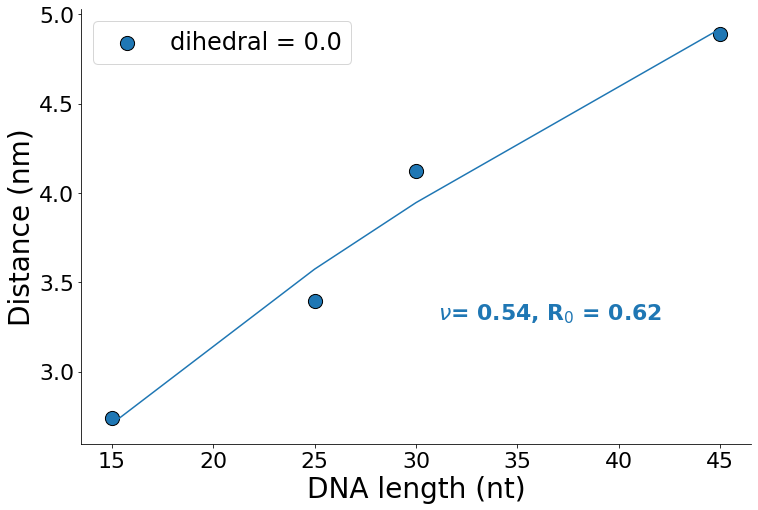

In [8]:
from scipy.optimize import curve_fit
fig, axp = plt.subplots(figsize=(12, 8))
length = [15, 25, 30, 45]


def scaling_law(x, A, v):
    return A * x**v


axp.scatter(length, median_dna_0, s=200,
            edgecolor='black', label='dihedral = 0.0')
#axp.scatter(length, median_dna_4, s=200,
#            edgecolor='black', label='dihedral = 0.4')

params0, covar0 = curve_fit(scaling_law, length, median_dna_0)
params4, covar4 = curve_fit(scaling_law, length, median_dna_4)

A0, v0 = params0
A4, v4 = params4
y_fit0 = scaling_law(length, A0, v0)
y_fit4 = scaling_law(length, A4, v4)

axp.plot(length, y_fit0)
#axp.plot(length, y_fit4)
axp.legend(fontsize=24)

axp.set_title('', fontsize=30, fontweight='bold')
axp.set_ylabel('Distance (nm)', fontsize=28)
axp.set_xlabel('DNA length (nt)', fontsize=28)
axp.xaxis.tick_bottom()
axp.yaxis.tick_left()
axp.tick_params(axis='both', which='major', labelsize=22)

spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    axp.spines[spine].set_visible(False)

plt.text(0.7, 0.3, f'$\\nu$= {v0:.2f}, R$_{0}$ = {A0:.2f}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=22, fontweight='bold', color='tab:blue')

#plt.text(0.2, 0.6, f'$\\nu$= {v4:.2f}, R$_{0}$ = {A4:.2f}',
#         horizontalalignment='center', verticalalignment='center',
#         transform=plt.gca().transAxes, fontsize=22, fontweight='bold', color='tab:orange')

fig.savefig('length_vs_distance_scatterplot_rpa_dna.png', dpi=300, bbox_inches='tight')


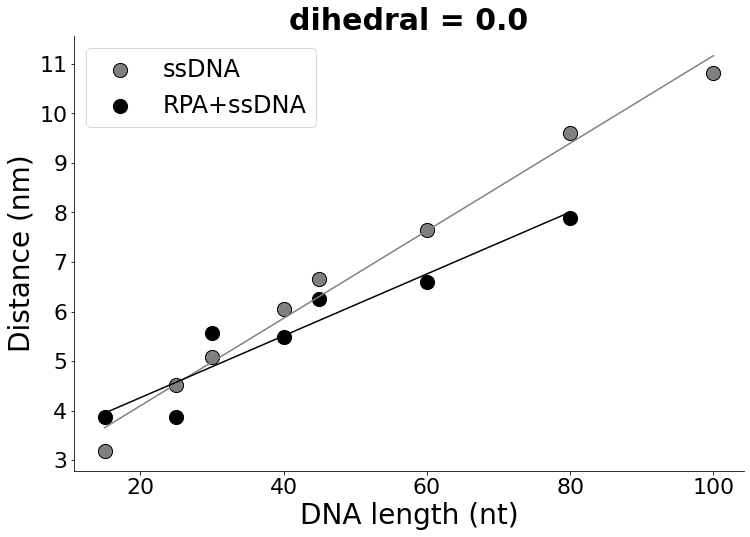

In [60]:
data_dna = np.loadtxt('dna_med_val_0.txt')
data_rpa = np.loadtxt('rpa_dna_med_val_0.txt')

fig, axp = plt.subplots(figsize=(12,8))

length_m = [15, 25, 30, 40, 45, 60, 80]
length = [15, 25, 30, 40, 45, 60, 80, 100]

axp.scatter(length, data_dna, label = 'ssDNA', color='gray', s=200, edgecolor='black')
axp.scatter(length_m, data_rpa, label='RPA+ssDNA', color='black', s=200, edgecolor='black')

axp.legend(fontsize=24)

axp.set_title('dihedral = 0.0', fontsize=30, fontweight='bold')
axp.set_ylabel('Distance (nm)', fontsize=28)
axp.set_xlabel('DNA length (nt)', fontsize=28)
axp.xaxis.tick_bottom()
axp.yaxis.tick_left()
axp.tick_params(axis='both', which='major', labelsize=22)

spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    axp.spines[spine].set_visible(False)
    
coefficients_d = np.polyfit(length, data_dna, 1)
fitted_line_d = np.polyval(coefficients_d, length)

coefficients_r = np.polyfit(length_m, data_rpa, 1)
fitted_line_r = np.polyval(coefficients_r, length_m)

axp.plot(length, fitted_line_d, color='gray')
axp.plot(length_m, fitted_line_r, color='black')
    
fig.savefig('rpa_ssdna_compare_0.png', dpi=300, bbox_inches='tight')

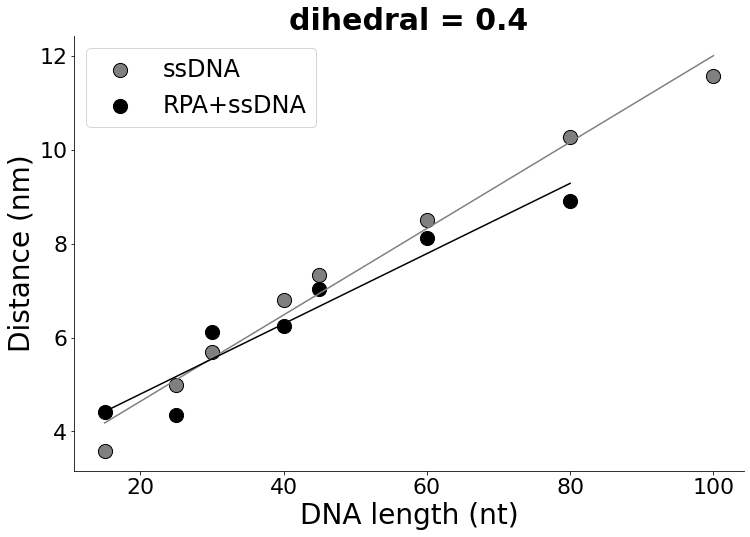

In [61]:
data_dna = np.loadtxt('dna_med_val_4.txt')
data_rpa = np.loadtxt('rpa_dna_med_val_4.txt')

fig, axp = plt.subplots(figsize=(12,8))

length_m = [15, 25, 30, 40, 45, 60, 80]
length = [15, 25, 30, 40, 45, 60, 80, 100]

axp.scatter(length, data_dna, label = 'ssDNA', s=200, color='gray', edgecolor='black')
axp.scatter(length_m, data_rpa, label='RPA+ssDNA', s=200, color='black', edgecolor='black')

axp.legend(fontsize=24)
axp.set_title('dihedral = 0.4', fontsize=30, fontweight='bold')
axp.set_ylabel('Distance (nm)', fontsize=28)
axp.set_xlabel('DNA length (nt)', fontsize=28)
axp.xaxis.tick_bottom()
axp.yaxis.tick_left()
axp.tick_params(axis='both', which='major', labelsize=22)

spines_to_keep = ['bottom', 'left']
spines_to_remove = ['top', 'right']

for spine in spines_to_remove:
    axp.spines[spine].set_visible(False)
    
coefficients_d = np.polyfit(length, data_dna, 1)
fitted_line_d = np.polyval(coefficients_d, length)

coefficients_r = np.polyfit(length_m, data_rpa, 1)
fitted_line_r = np.polyval(coefficients_r, length_m)

axp.plot(length, fitted_line_d, color='gray')
axp.plot(length_m, fitted_line_r, color='black')
    
fig.savefig('rpa_ssdna_compare_4.png', dpi=300, bbox_inches='tight')